<a href="https://colab.research.google.com/github/SandeebAdhikari/cs370-assignments/blob/main/assignment-2/Assignment1_Part2_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 3: Stochastic Gradient Descent (30 points)
In class we covered the baseline stochastic gradient descent. Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

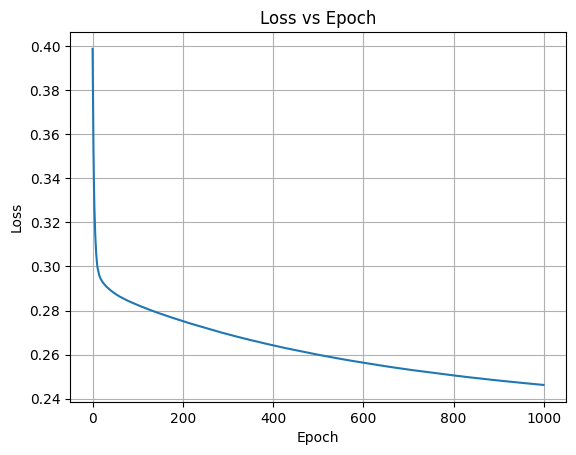

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear regression model
class LinearRegression:
    def __init__(self):
        self.w = None
    
    def forward(self, X):
        return np.dot(X, self.w)
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    
    def backward(self, X, y_pred, y_true):
        gradient = np.dot(X.T, y_pred - y_true) / len(X)
        return gradient
    
    def update_parameters(self, gradient, learning_rate):
        self.w -= learning_rate * gradient

# Define the training data generation function
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# Generate training data
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)

# Define hyperparameters
learning_rate = 0.01
epochs = 1000

# Initialize linear regression model
model = LinearRegression()

# Transform input data to polynomial features
X_train = np.column_stack((x_train**0, x_train**1, x_train**2, x_train**3))
input_dim = X_train.shape[1]
model.w = np.random.randn(input_dim)  # Initialize weights randomly

# Training loop
loss_history = []
for epoch in range(epochs):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    
    # Iterate through each sample in the training data
    for X, y_true in zip(X_train_shuffled, y_train_shuffled):
        X = np.array([X])  # Convert X to a 2D array
        y_pred = model.forward(X)
        loss = model.compute_loss(y_pred, y_true)
        gradient = model.backward(X, y_pred, y_true)
        model.update_parameters(gradient, learning_rate)
    
    # Compute loss at the end of each epoch
    y_pred_epoch = model.forward(X_train)
    loss_epoch = model.compute_loss(y_pred_epoch, y_train)
    loss_history.append(loss_epoch)

# Plot loss versus epoch
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

Problem 4: SGD Enhancements (30 points)
In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

Momentum (15 points)

Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

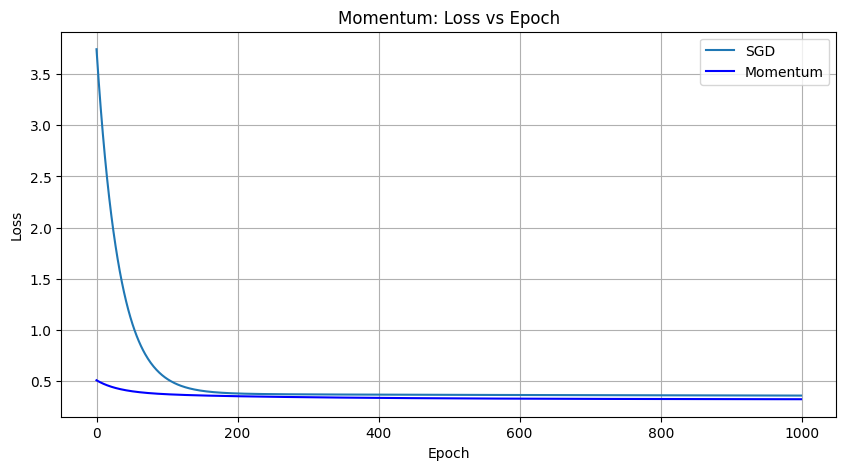

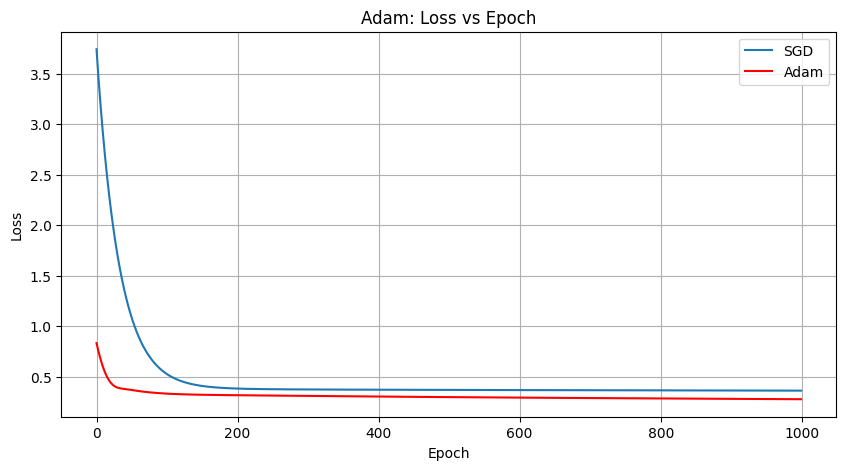

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear regression model
class LinearRegression:
    def __init__(self):
        self.w = None
    
    def forward(self, X):
        return np.dot(X, self.w)
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    
    def backward(self, X, y_pred, y_true):
        gradient = np.dot(X.T, y_pred - y_true) / len(X)
        return gradient

# Baseline SGD
def sgd_update(model, gradient, learning_rate):
    model.w -= learning_rate * gradient

# Momentum update
def momentum_update(model, gradient, learning_rate, momentum, velocity):
    velocity = momentum * velocity - learning_rate * gradient
    model.w += velocity

# Adam update
def adam_update(model, gradient, learning_rate, beta1, beta2, epsilon, m, v, t):
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * (gradient ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    model.w -= (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat
    return m, v

# Define the training data generation function
def create_toy_data(func, sample_size, std, domain=None):
    if domain is None:
        domain = [0, 1]
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# Generate training data
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)

# Transform input data to polynomial features
X_train = np.column_stack((x_train**0, x_train**1, x_train**2, x_train**3))
input_dim = X_train.shape[1]

# Define hyperparameters
learning_rate = 0.01
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = 1000

# Initialize linear regression model for Baseline SGD
model_sgd = LinearRegression()
model_sgd.w = np.random.randn(input_dim)  # Initialize weights randomly

# Initialize linear regression model for Momentum
model_momentum = LinearRegression()
model_momentum.w = np.random.randn(input_dim)  # Initialize weights randomly
velocity = 0

# Initialize linear regression model for Adam
model_adam = LinearRegression()
model_adam.w = np.random.randn(input_dim)  # Initialize weights randomly
m = 0
v = 0

# Training loop for Baseline SGD
loss_history_sgd = []
for epoch in range(epochs):
    y_pred_epoch = model_sgd.forward(X_train)
    loss_epoch = model_sgd.compute_loss(y_pred_epoch, y_train)
    loss_history_sgd.append(loss_epoch)
    gradient = model_sgd.backward(X_train, y_pred_epoch, y_train)
    sgd_update(model_sgd, gradient, learning_rate)

# Training loop for Momentum
loss_history_momentum = []
for epoch in range(epochs):
    y_pred_epoch = model_momentum.forward(X_train)
    loss_epoch = model_momentum.compute_loss(y_pred_epoch, y_train)
    loss_history_momentum.append(loss_epoch)
    gradient = model_momentum.backward(X_train, y_pred_epoch, y_train)
    momentum_update(model_momentum, gradient, learning_rate, momentum, velocity)

# Training loop for Adam
loss_history_adam = []
for epoch in range(epochs):
    y_pred_epoch = model_adam.forward(X_train)
    loss_epoch = model_adam.compute_loss(y_pred_epoch, y_train)
    loss_history_adam.append(loss_epoch)
    gradient = model_adam.backward(X_train, y_pred_epoch, y_train)
    m, v = adam_update(model_adam, gradient, learning_rate, beta1, beta2, epsilon, m, v, epoch + 1)


# Plot loss versus epoch for Momentum
plt.figure(figsize=(10, 5))
plt.plot(loss_history_sgd, label='SGD')
plt.plot(loss_history_momentum, label='Momentum', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Momentum: Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss versus epoch for Adam
plt.figure(figsize=(10, 5))
plt.plot(loss_history_sgd, label='SGD')
plt.plot(loss_history_adam, label='Adam', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Adam: Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()
